#ETL - Proyecto 2 BI

## Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

## Datos 2017

In [ ]:
df_17 = pd.read_csv('data/2017Procesados.csv', encoding="ISO-8859-1", sep=',')
df_17.head()

,DIRECTORIO_PER,DIRECTORIO_HOG,DIRECTORIO,SECUENCIA_P,Edad,Sexo,Asma,JardinPatio,AzoteaTerraza,CombCocinar,Humedad,NivelVentilacion,Estrato,ContAire,SECUENCIA,CODLOCALIDAD,NOMLOCALIDAD
0,10100011,1010001,101000,1,56,1,2,1,,2,2.0,2.0,2.0,2.0,1.0,11,Suba
1,10100012,1010001,101000,1,48,2,2,1,,2,2.0,2.0,2.0,2.0,1.0,11,Suba
2,10100013,1010001,101000,1,22,2,2,1,,2,2.0,2.0,2.0,2.0,1.0,11,Suba
3,10100111,1010011,101001,1,42,1,2,1,,2,1.0,2.0,3.0,2.0,1.0,1,UsaquÃ©n
4,10100112,1010011,101001,1,43,2,2,1,,2,1.0,2.0,3.0,2.0,1.0,1,UsaquÃ©n


### Edad

In [ ]:
df_17['Edad'].describe()

count    218079.000000
mean         36.208608
std          21.210922
min           0.000000
25%          19.000000
50%          34.000000
75%          52.000000
max         107.000000
Name: Edad, dtype: float64

In [ ]:
# Obtener los límites de cada categoría
df_17['Edad'] = pd.cut(df_17['Edad'], bins=[0, 18, 30, 45, 60, float('inf')], labels=['Menor de 18', '18-30', '31-45', '46-60', 'Mayor de 60'])

# Imprimir el resultado
df_17['Edad'].value_counts()

Menor de 18    49346
31-45          48110
18-30          44527
46-60          42178
Mayor de 60    31990
Name: Edad, dtype: int64

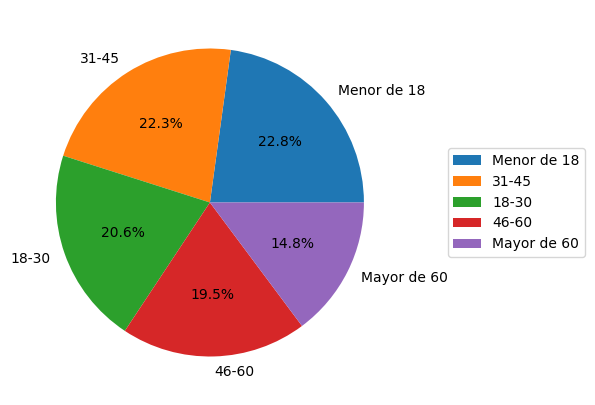

In [ ]:
edad17 = df_17['Edad'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(edad17.values, labels=edad17.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1,0.5))

### Sexo

In [ ]:
# Definir el diccionario de mapeo de las categorías
mapeo_sexo = {1: 'Hombre', 2: 'Mujer', 3: 'Intersexual'}

# Reemplazar las categorías en la columna "Sexo" utilizando el diccionario de mapeo
df_17['Sexo'] = df_17['Sexo'].replace(mapeo_sexo)

# Imprimir el resultado
print(df_17['Sexo'].value_counts())

Mujer          115403
Hombre         102659
Intersexual        17
Name: Sexo, dtype: int64


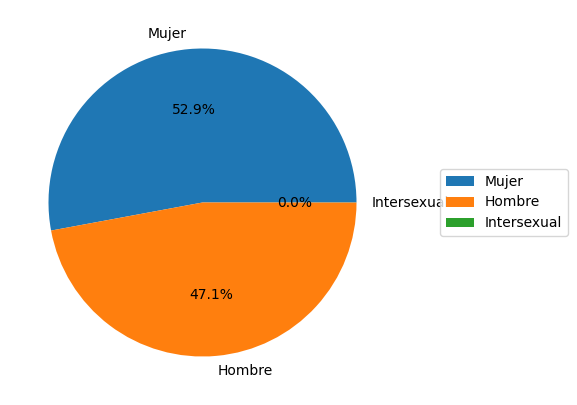

In [ ]:
sexo17 = df_17['Sexo'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(sexo17.values, labels=sexo17.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1,0.5))

### Asma

In [ ]:
# Definir el diccionario de mapeo de las categorías
mapeo_Asma = {1: 'Si', 2: 'No'}

# Reemplazar las categorías en la columna "Asma" utilizando el diccionario de mapeo
df_17['Asma'] = df_17['Asma'].replace(mapeo_Asma)

# Imprimir el resultado
print(df_17['Asma'].value_counts())

No    214946
Si      3133
Name: Asma, dtype: int64


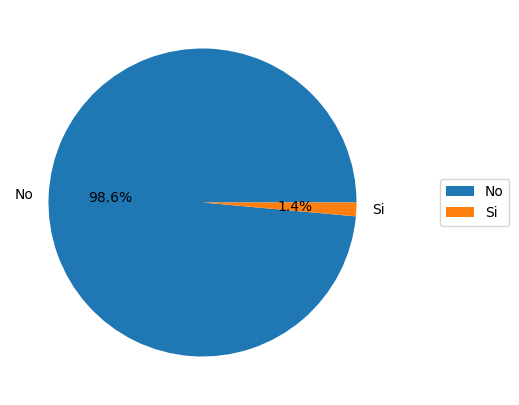

In [ ]:
Asma17 = df_17['Asma'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(Asma17.values, labels=Asma17.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1,0.5))

### Humedad en la casa

In [ ]:
# Definir el diccionario de mapeo de las categorías
mapeo_Humedad = {1: 'Si', 2: 'No'}

# Reemplazar las categorías en la columna "Humedad" utilizando el diccionario de mapeo
df_17['Humedad'] = df_17['Humedad'].replace(mapeo_Humedad)

# Imprimir el resultado
print(df_17['Humedad'].value_counts())

No    169384
Si     48695
Name: Humedad, dtype: int64


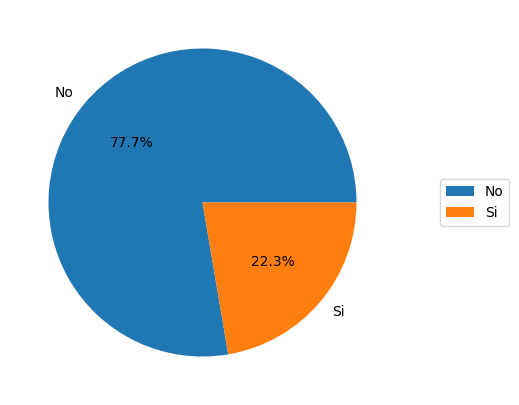

In [ ]:
Humedad17 = df_17['Humedad'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(Humedad17.values, labels=Humedad17.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1,0.5))

### Nivel de ventilacion 

In [ ]:
# Definir el diccionario de mapeo de las categorías
mapeo_NivelVentilacion = {1: 'Alta', 2: 'Baja'}

# Reemplazar las categorías en la columna "NivelVentilacion" utilizando el diccionario de mapeo
df_17['NivelVentilacion'] = df_17['NivelVentilacion'].replace(mapeo_NivelVentilacion)

# Imprimir el resultado
print(df_17['NivelVentilacion'].value_counts())

Baja    208134
Alta      9945
Name: NivelVentilacion, dtype: int64


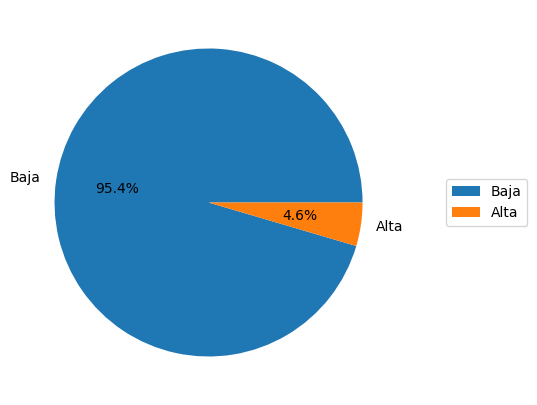

In [ ]:
NivelVentilacion17 = df_17['NivelVentilacion'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(NivelVentilacion17.values, labels=NivelVentilacion17.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1,0.5))

### Estrato

In [ ]:
df_17['Estrato'].value_counts()

2.0    82388
3.0    75344
4.0    28830
1.0    22612
5.0     6082
6.0     2823
Name: Estrato, dtype: int64

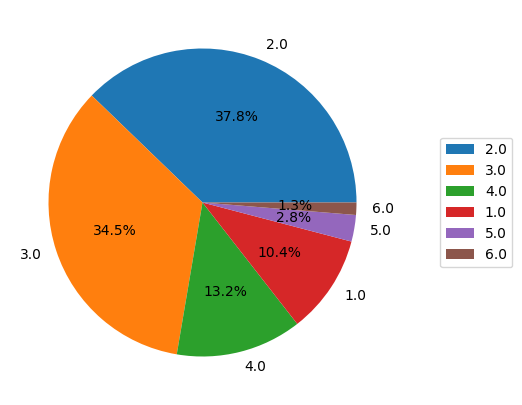

In [ ]:
Estrato17 = df_17['Estrato'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(Estrato17.values, labels=Estrato17.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1,0.5))

## Datos 2021

In [ ]:
df_21 = pd.read_csv('data/2021Procesados.csv', encoding="ISO-8859-1", sep=',')
df_21.head()

,DIRECTORIO_PER,DIRECTORIO_HOG,DIRECTORIO,SECUENCIA_P,Edad,Sexo,EnfRespiratorias,JardinPatio,AzoteaTerraza,CombCocinar,Humedad,NivelVentilacion,Estrato,ContAire,COD_LOCALIDAD,NOMLOCALIDAD
0,16623811,1662381,166238.0,1,70,2,2,2,2,6.0,2,2,2.0,2,2,Chapinero
1,16623812,1662381,166238.0,1,78,1,2,2,2,6.0,2,2,2.0,2,2,Chapinero
2,22010211,2201021,220102.0,1,45,1,2,1,2,3.0,2,2,2.0,2,19,Ciudad BolÃ­var
3,22010212,2201021,220102.0,1,39,2,1,1,2,3.0,2,2,2.0,2,19,Ciudad BolÃ­var
4,22010213,2201021,220102.0,1,17,1,2,1,2,3.0,2,2,2.0,2,19,Ciudad BolÃ­var


Primero que todo se hara una conversión de las variables. Esto con el objetivo de que queden faciles de visualizar al acceder desde un tablero de control 

### Edad

Se definiran rangos para la edad. Estos seran los siguientes

In [ ]:
df_21['Edad'].describe()

count    234578.000000
mean         37.266402
std          21.381762
min           0.000000
25%          20.000000
50%          35.000000
75%          54.000000
max         108.000000
Name: Edad, dtype: float64

In [ ]:
# Obtener los límites de cada categoría
df_21['Edad'] = pd.cut(df_21['Edad'], bins=[0, 18, 30, 45, 60, float('inf')], labels=['Menor de 18', '18-30', '31-45', '46-60', 'Mayor de 60'])

# Imprimir el resultado
df_21['Edad'].value_counts()

31-45          52604
Menor de 18    50078
18-30          47098
46-60          44684
Mayor de 60    38419
Name: Edad, dtype: int64

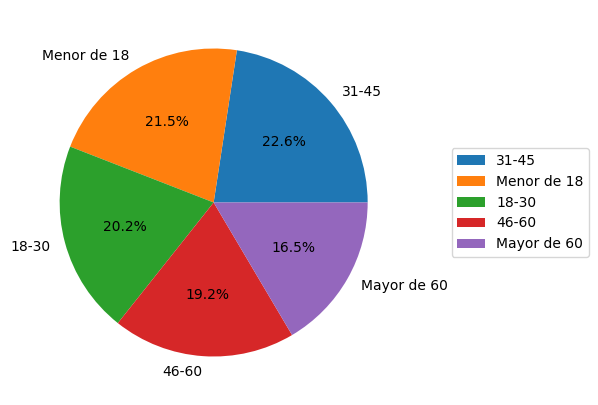

In [ ]:
edad21 = df_21['Edad'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(edad21.values, labels=edad21.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1,0.5))

De esta manera se puede categorizar facilmente las edades de las personas y se puede hacer un análisis a diferentes grupos de personas

### Sexo

Aca se quiere cambiar que el sexo para que represente a diferencia de manejarlo con numeros

In [ ]:
# Definir el diccionario de mapeo de las categorías
mapeo_sexo = {1: 'Hombre', 2: 'Mujer', 3: 'Intersexual'}

# Reemplazar las categorías en la columna "Sexo" utilizando el diccionario de mapeo
df_21['Sexo'] = df_21['Sexo'].replace(mapeo_sexo)

# Imprimir el resultado
print(df_21['Sexo'].value_counts())

Mujer          124947
Hombre         109575
Intersexual        56
Name: Sexo, dtype: int64


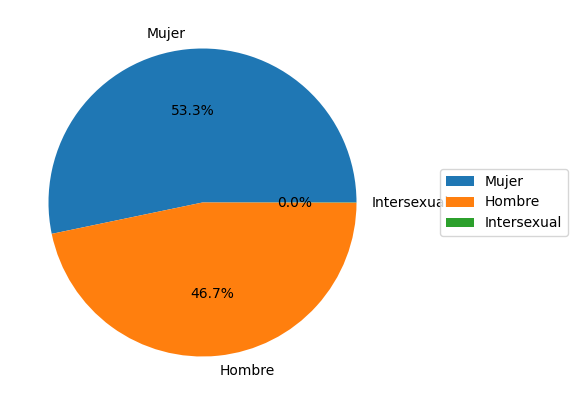

In [ ]:
sexo21 = df_21['Sexo'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(sexo21.values, labels=sexo21.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1,0.5))

### Enfermedades Respiratorias

Aca se quiere indicar facilmente si tiene alguna enfermedad respiratoria

In [ ]:
# Definir el diccionario de mapeo de las categorías
mapeo_enfRespiratorias = {1: 'Si', 2: 'No'}

# Reemplazar las categorías en la columna "enfRespiratorias" utilizando el diccionario de mapeo
df_21['EnfRespiratorias'] = df_21['EnfRespiratorias'].replace(mapeo_enfRespiratorias)

# Imprimir el resultado
print(df_21['EnfRespiratorias'].value_counts())

No    227358
Si      7220
Name: EnfRespiratorias, dtype: int64


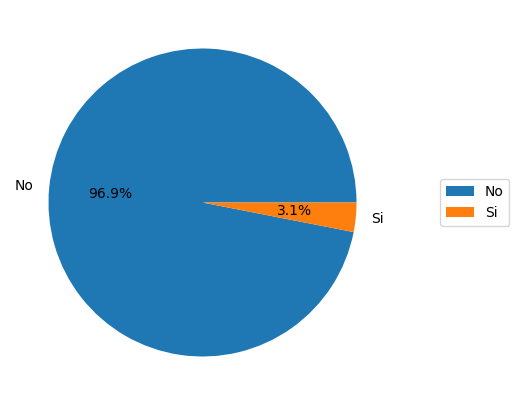

In [ ]:
EnfRespiratorias21 = df_21['EnfRespiratorias'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(EnfRespiratorias21.values, labels=EnfRespiratorias21.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1,0.5))

### Humedad en la casa

In [ ]:
# Definir el diccionario de mapeo de las categorías
mapeo_Humedad = {1: 'Si', 2: 'No'}

# Reemplazar las categorías en la columna "Humedad" utilizando el diccionario de mapeo
df_21['Humedad'] = df_21['Humedad'].replace(mapeo_Humedad)

# Imprimir el resultado
print(df_21['Humedad'].value_counts())

No    173802
Si     60776
Name: Humedad, dtype: int64


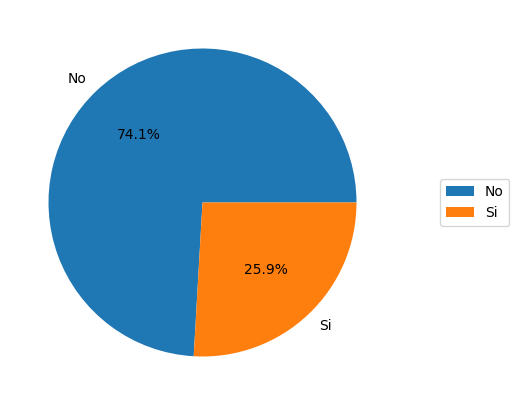

In [ ]:
Humedad21 = df_21['Humedad'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(Humedad21.values, labels=Humedad21.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1,0.5))

### Nivel ventilacion en la casa

In [ ]:
# Definir el diccionario de mapeo de las categorías
mapeo_NivelVentilacion = {1: 'Baja', 2: 'Alta'}

# Reemplazar las categorías en la columna "NivelVentilacion" utilizando el diccionario de mapeo
df_21['NivelVentilacion'] = df_21['NivelVentilacion'].replace(mapeo_NivelVentilacion)

# Imprimir el resultado
print(df_21['NivelVentilacion'].value_counts())

NameError: ignored

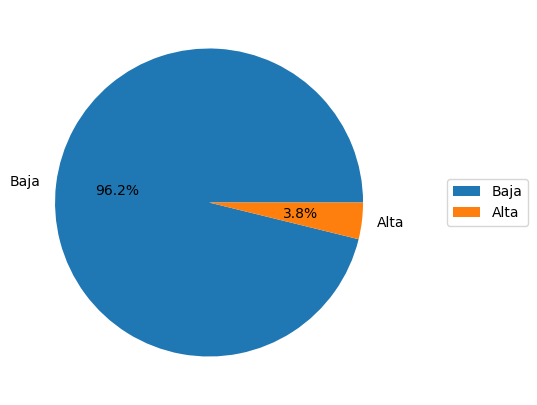

In [ ]:
NivelVentilacion21 = df_21['NivelVentilacion'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(NivelVentilacion21.values, labels=NivelVentilacion21.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1,0.5))

### Contaminacion del aire 

No    166766
Si     67812
Name: ContAire, dtype: int64


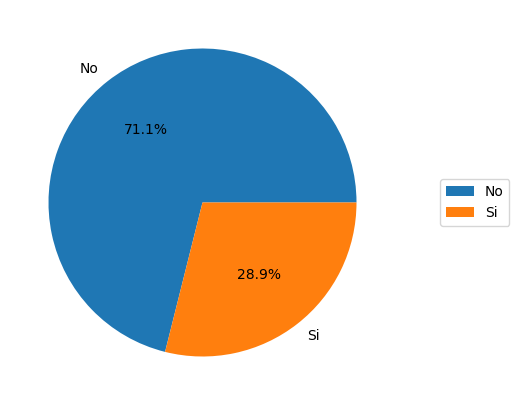

In [ ]:
# Definir el diccionario de mapeo de las categorías
mapeo_ContAire = {1: 'Si', 2: 'No'}

# Reemplazar las categorías en la columna "ContAire" utilizando el diccionario de mapeo
df_21['ContAire'] = df_21['ContAire'].replace(mapeo_ContAire)

# Imprimir el resultado
print(df_21['ContAire'].value_counts())

ContAire21 = df_21['ContAire'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(ContAire21.values, labels=ContAire21.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1,0.5))

### Estrato

In [ ]:
df_21['Estrato'].value_counts()

2.0    83252
3.0    76799
4.0    33536
1.0    24546
5.0     9937
6.0     5973
Name: Estrato, dtype: int64

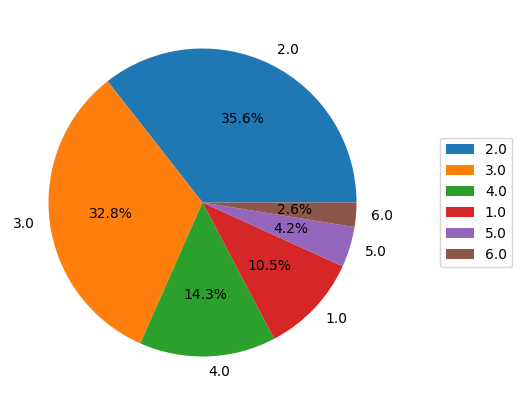

In [ ]:
Estrato21 = df_21['Estrato'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(Estrato21.values, labels=Estrato21.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1,0.5))

### NomLocalidad

A esta no es necesario hacerle ningun cambio

### Creación de tablas para el modelo relacional.

In [ ]:
print(df_21['Estrato'].value_counts())
estratos = df_21['Estrato'].unique()
estratos = np.delete(estratos, 3)
estratos = estratos.astype(int)
estratos.sort()
dataEstrato = {
    'idEstrato': estratos,
    'Estrato': estratos
}
tabla_estrato = pd.DataFrame(dataEstrato)
tabla_estrato['idEstrato'] = 'E' + tabla_estrato['idEstrato'].astype(str)
tabla_estrato.dropna()
tabla_estrato

2.0    83252
3.0    76799
4.0    33536
1.0    24546
5.0     9937
6.0     5973
Name: Estrato, dtype: int64


,idEstrato,Estrato
0,E1,1
1,E2,2
2,E3,3
3,E4,4
4,E5,5
5,E6,6


In [ ]:
df_21['NOMLOCALIDAD'].unique()

array(['Chapinero', 'Ciudad BolÃ\xadvar', 'Suba', 'Kennedy', 'FontibÃ³n',
       'San CristÃ³bal', 'Rafael Uribe Uribe', 'Sumapaz', 'Usme',
       'SantafÃ©', 'Puente Aranda', 'Tunjuelito', 'Antonio NariÃ±o',
       'Teusaquillo', 'Bosa', 'EngativÃ¡', 'La Candelaria',
       'Los MÃ¡rtires', 'Barrios Unidos', 'UsaquÃ©n'], dtype=object)

In [ ]:
localidades=['Chapinero', 'Ciudad BolÃ\xadvar', 'Suba', 'Kennedy', 'FontibÃ³n',
       'San CristÃ³bal', 'Rafael Uribe Uribe', 'Sumapaz', 'Usme',
       'SantafÃ©', 'Puente Aranda', 'Tunjuelito', 'Antonio NariÃ±o',
       'Teusaquillo', 'Bosa', 'EngativÃ¡', 'La Candelaria',
       'Los MÃ¡rtires', 'Barrios Unidos', 'UsaquÃ©n']

tabla_localidad = pd.DataFrame(localidades, columns=['localidad'])
tabla_localidad['idLocalidad'] = range(1, len(tabla_localidad) + 1) 
tabla_localidad['idLocalidad'] = 'L' + tabla_localidad['idLocalidad'].astype(str)
tabla_localidad

,localidad,idLocalidad
0,Chapinero,L1
1,Ciudad BolÃ­var,L2
2,Suba,L3
3,Kennedy,L4
4,FontibÃ³n,L5
5,San CristÃ³bal,L6
6,Rafael Uribe Uribe,L7
7,Sumapaz,L8
8,Usme,L9
9,SantafÃ©,L10


In [ ]:
sexos = df_21['Sexo'].unique()

tabla_sexo = pd.DataFrame(sexos, columns=['sexoBio'])
tabla_sexo['idSexo'] = ['F','M','I'] 
tabla_sexo

,sexoBio,idSexo
0,Mujer,F
1,Hombre,M
2,Intersexual,I


In [ ]:
rangos_edad = df_21['Edad'].unique()
rangos_edad = np.delete(rangos_edad, 5)

tabla_edad = pd.DataFrame(rangos_edad, columns=['rango_edad'])
tabla_edad['idEdad'] = [60,31,0,18,46]
tabla_edad.sort_values('idEdad', inplace=True) 
tabla_edad

,rango_edad,idEdad
2,Menor de 18,0
3,18-30,18
1,31-45,31
4,46-60,46
0,Mayor de 60,60


In [ ]:
enfermedades =  df_21['EnfRespiratorias'].unique()
enfermedades
tabla_enfermedad = pd.DataFrame(enfermedades, columns=['enf_resp'])
tabla_enfermedad['idEnfermedad'] = range(1, len(tabla_enfermedad) + 1) 
tabla_enfermedad['idEnfermedad'] = 'ENF' + tabla_enfermedad['idEnfermedad'].astype(str)
tabla_enfermedad

,enf_resp,idEnfermedad
0,No,ENF1
1,Si,ENF2


In [ ]:
valores_humedad = df_21['Humedad'].unique()
valores_humedad
tabla_humedad = pd.DataFrame(valores_humedad, columns=['humedad'])
tabla_humedad['idHumedad'] = range(1, len(tabla_humedad) + 1) 
tabla_humedad['idHumedad'] = 'H' + tabla_humedad['idHumedad'].astype(str)
tabla_humedad

,humedad,idHumedad
0,No,H1
1,Si,H2


In [ ]:
valores_ventilacion = df_21['NivelVentilacion'].unique()
valores_ventilacion
tabla_ventilacion = pd.DataFrame(valores_ventilacion, columns=['Ventilacion'])
tabla_ventilacion['idVentilacion'] = range(1, len(tabla_ventilacion) + 1) 
tabla_ventilacion['idVentilacion'] = 'V' + tabla_ventilacion['idVentilacion'].astype(str)
tabla_ventilacion

,Ventilacion,idVentilacion
0,Baja,V1
1,Alta,V2


In [ ]:
valores_ContAire = df_21['ContAire'].unique()
valores_ContAire
tabla_ContAire = pd.DataFrame(valores_ContAire, columns=['ContAire'])
tabla_ContAire['idContAire'] = range(1, len(tabla_ContAire) + 1) 
tabla_ContAire['idContAire'] = 'CA' + tabla_ContAire['idContAire'].astype(str)
tabla_ContAire

,ContAire,idContAire
0,No,CA1
1,Si,CA2


Construcción de la tabla de Hechos

In [ ]:
tabla_hechos = pd.DataFrame()
### NOMLOCALIDAD / Estrato / Edad / EnfRespiratorias / Humedad / Sexo
dataframes = [tabla_localidad, tabla_estrato, tabla_edad, tabla_enfermedad, tabla_humedad, tabla_ventilacion, tabla_ContAire, tabla_sexo]
tables= [tabla_localidad['localidad'], tabla_estrato['Estrato'], tabla_edad['rango_edad'], tabla_enfermedad['enf_resp'], tabla_humedad['humedad'], tabla_ventilacion['Ventilacion'], tabla_ContAire['ContAire'], tabla_sexo['sexoBio']]
permute_column = tabla_localidad['idLocalidad']
tables = [df.drop(columns='idLocalidad') for df in tables]
df_permutations2 = pd.DataFrame(list(product(permute_column, *tables)))
df_permutations2 = df_permutations2.drop(df_permutations2.columns[0], axis=1)
df_permutations2

,1,2,3,4,5,6,7,8
0,Chapinero,1,Menor de 18,No,No,Baja,No,Mujer
1,Chapinero,1,Menor de 18,No,No,Baja,No,Hombre
2,Chapinero,1,Menor de 18,No,No,Baja,No,Intersexual
3,Chapinero,1,Menor de 18,No,No,Baja,Si,Mujer
4,Chapinero,1,Menor de 18,No,No,Baja,Si,Hombre
...,...,...,...,...,...,...,...,...
575995,UsaquÃ©n,6,Mayor de 60,Si,Si,Alta,No,Hombre
575996,UsaquÃ©n,6,Mayor de 60,Si,Si,Alta,No,Intersexual
575997,UsaquÃ©n,6,Mayor de 60,Si,Si,Alta,Si,Mujer
575998,UsaquÃ©n,6,Mayor de 60,Si,Si,Alta,Si,Hombre


In [ ]:
df_21 = df_21[['NOMLOCALIDAD','Estrato','Edad','EnfRespiratorias','Humedad','NivelVentilacion','ContAire','Sexo']]

# Renombrar las columnas de la tabla de permutaciones
df_permutations2.columns = ['NOMLOCALIDAD', 'Estrato', 'Edad', 'EnfRespiratorias', 'Humedad', 'NivelVentilacion', 'ContAire', 'Sexo']

# Cuenta las repeticiones de cada permutación en df_21
counts = df_21.value_counts()

# Convierte el resultado en un DataFrame
counts_df = counts.reset_index()
counts_df.columns = ['NOMLOCALIDAD', 'Estrato', 'Edad', 'EnfRespiratorias', 'Humedad','NivelVentilacion','ContAire', 'Sexo', 'Count']

df_permutations2 = df_permutations2.drop_duplicates(subset=['NOMLOCALIDAD', 'Estrato', 'Edad', 'EnfRespiratorias', 'Humedad','NivelVentilacion', 'ContAire', 'Sexo'])
counts_df = counts_df.drop_duplicates(subset=['NOMLOCALIDAD', 'Estrato', 'Edad', 'EnfRespiratorias', 'Humedad','NivelVentilacion', 'ContAire', 'Sexo'])

# Une las permutaciones con el recuento de repeticiones
tabla_hechos_con_repeticiones = pd.merge(df_permutations2, counts_df, on=['NOMLOCALIDAD', 'Estrato', 'Edad', 'EnfRespiratorias', 'Humedad', 'NivelVentilacion','ContAire', 'Sexo'], how='left')
tabla_hechos_con_repeticiones['Count'] = tabla_hechos_con_repeticiones['Count'].fillna(0)
tabla_hechos_con_repeticiones

,NOMLOCALIDAD,Estrato,Edad,EnfRespiratorias,Humedad,NivelVentilacion,ContAire,Sexo,Count
0,Chapinero,1,Menor de 18,No,No,Baja,No,Mujer,21.0
1,Chapinero,1,Menor de 18,No,No,Baja,No,Hombre,15.0
2,Chapinero,1,Menor de 18,No,No,Baja,No,Intersexual,0.0
3,Chapinero,1,Menor de 18,No,No,Baja,Si,Mujer,2.0
4,Chapinero,1,Menor de 18,No,No,Baja,Si,Hombre,2.0
...,...,...,...,...,...,...,...,...,...
28795,UsaquÃ©n,6,Mayor de 60,Si,Si,Alta,No,Hombre,0.0
28796,UsaquÃ©n,6,Mayor de 60,Si,Si,Alta,No,Intersexual,0.0
28797,UsaquÃ©n,6,Mayor de 60,Si,Si,Alta,Si,Mujer,0.0
28798,UsaquÃ©n,6,Mayor de 60,Si,Si,Alta,Si,Hombre,0.0


In [ ]:
column_sum = tabla_hechos_con_repeticiones['Count'].sum()
column_sum

232354.0

## Conversión a CSV

Lo primero que se hace es la tabla que tiene las metricas pero necesitamos pasar a que esten en terminos de los indicadores

In [ ]:
tabla_estrato
mapeo_Estrato = tabla_estrato.set_index('Estrato')['idEstrato'].to_dict()

df_2021 = tabla_hechos_con_repeticiones

df_2021['Estrato'] = df_2021['Estrato'].replace(mapeo_Estrato)

df_2021

,NOMLOCALIDAD,Estrato,Edad,EnfRespiratorias,Humedad,NivelVentilacion,ContAire,Sexo,Count
0,Chapinero,E1,Menor de 18,No,No,Baja,No,Mujer,21.0
1,Chapinero,E1,Menor de 18,No,No,Baja,No,Hombre,15.0
2,Chapinero,E1,Menor de 18,No,No,Baja,No,Intersexual,0.0
3,Chapinero,E1,Menor de 18,No,No,Baja,Si,Mujer,2.0
4,Chapinero,E1,Menor de 18,No,No,Baja,Si,Hombre,2.0
...,...,...,...,...,...,...,...,...,...
28795,UsaquÃ©n,E6,Mayor de 60,Si,Si,Alta,No,Hombre,0.0
28796,UsaquÃ©n,E6,Mayor de 60,Si,Si,Alta,No,Intersexual,0.0
28797,UsaquÃ©n,E6,Mayor de 60,Si,Si,Alta,Si,Mujer,0.0
28798,UsaquÃ©n,E6,Mayor de 60,Si,Si,Alta,Si,Hombre,0.0


In [ ]:
tabla_localidad
mapeo_localidad = tabla_localidad.set_index('localidad')['idLocalidad'].to_dict()

df_2021 = tabla_hechos_con_repeticiones

df_2021['NOMLOCALIDAD'] = df_2021['NOMLOCALIDAD'].replace(mapeo_localidad)
df_2021.rename(columns={'NOMLOCALIDAD': 'Localidad'}, inplace=True)

df_2021

,Localidad,Estrato,Edad,EnfRespiratorias,Humedad,NivelVentilacion,ContAire,Sexo,Count
0,L1,E1,Menor de 18,No,No,Baja,No,Mujer,21.0
1,L1,E1,Menor de 18,No,No,Baja,No,Hombre,15.0
2,L1,E1,Menor de 18,No,No,Baja,No,Intersexual,0.0
3,L1,E1,Menor de 18,No,No,Baja,Si,Mujer,2.0
4,L1,E1,Menor de 18,No,No,Baja,Si,Hombre,2.0
...,...,...,...,...,...,...,...,...,...
28795,L20,E6,Mayor de 60,Si,Si,Alta,No,Hombre,0.0
28796,L20,E6,Mayor de 60,Si,Si,Alta,No,Intersexual,0.0
28797,L20,E6,Mayor de 60,Si,Si,Alta,Si,Mujer,0.0
28798,L20,E6,Mayor de 60,Si,Si,Alta,Si,Hombre,0.0


In [ ]:
tabla_edad
mapeo_Edad = tabla_edad.set_index('rango_edad')['idEdad'].to_dict()

df_2021 = tabla_hechos_con_repeticiones

df_2021['Edad'] = df_2021['Edad'].replace(mapeo_Edad)

df_2021

,Localidad,Estrato,Edad,EnfRespiratorias,Humedad,NivelVentilacion,ContAire,Sexo,Count
0,L1,E1,0,No,No,Baja,No,Mujer,21.0
1,L1,E1,0,No,No,Baja,No,Hombre,15.0
2,L1,E1,0,No,No,Baja,No,Intersexual,0.0
3,L1,E1,0,No,No,Baja,Si,Mujer,2.0
4,L1,E1,0,No,No,Baja,Si,Hombre,2.0
...,...,...,...,...,...,...,...,...,...
28795,L20,E6,60,Si,Si,Alta,No,Hombre,0.0
28796,L20,E6,60,Si,Si,Alta,No,Intersexual,0.0
28797,L20,E6,60,Si,Si,Alta,Si,Mujer,0.0
28798,L20,E6,60,Si,Si,Alta,Si,Hombre,0.0


In [ ]:
tabla_enfermedad
mapeo_EnfRespiratorias = tabla_enfermedad.set_index('enf_resp')['idEnfermedad'].to_dict()

df_2021 = tabla_hechos_con_repeticiones

df_2021['EnfRespiratorias'] = df_2021['EnfRespiratorias'].replace(mapeo_EnfRespiratorias)

df_2021

,Localidad,Estrato,Edad,EnfRespiratorias,Humedad,NivelVentilacion,ContAire,Sexo,Count
0,L1,E1,0,ENF1,No,Baja,No,Mujer,21.0
1,L1,E1,0,ENF1,No,Baja,No,Hombre,15.0
2,L1,E1,0,ENF1,No,Baja,No,Intersexual,0.0
3,L1,E1,0,ENF1,No,Baja,Si,Mujer,2.0
4,L1,E1,0,ENF1,No,Baja,Si,Hombre,2.0
...,...,...,...,...,...,...,...,...,...
28795,L20,E6,60,ENF2,Si,Alta,No,Hombre,0.0
28796,L20,E6,60,ENF2,Si,Alta,No,Intersexual,0.0
28797,L20,E6,60,ENF2,Si,Alta,Si,Mujer,0.0
28798,L20,E6,60,ENF2,Si,Alta,Si,Hombre,0.0


In [ ]:
tabla_humedad
mapeo_Humedad = tabla_humedad.set_index('humedad')['idHumedad'].to_dict()

df_2021 = tabla_hechos_con_repeticiones

df_2021['Humedad'] = df_2021['Humedad'].replace(mapeo_Humedad)

df_2021

,Localidad,Estrato,Edad,EnfRespiratorias,Humedad,NivelVentilacion,ContAire,Sexo,Count
0,L1,E1,0,ENF1,H1,Baja,No,Mujer,21.0
1,L1,E1,0,ENF1,H1,Baja,No,Hombre,15.0
2,L1,E1,0,ENF1,H1,Baja,No,Intersexual,0.0
3,L1,E1,0,ENF1,H1,Baja,Si,Mujer,2.0
4,L1,E1,0,ENF1,H1,Baja,Si,Hombre,2.0
...,...,...,...,...,...,...,...,...,...
28795,L20,E6,60,ENF2,H2,Alta,No,Hombre,0.0
28796,L20,E6,60,ENF2,H2,Alta,No,Intersexual,0.0
28797,L20,E6,60,ENF2,H2,Alta,Si,Mujer,0.0
28798,L20,E6,60,ENF2,H2,Alta,Si,Hombre,0.0


In [ ]:
tabla_ventilacion
mapeo_NivelVentilacion = tabla_ventilacion.set_index('Ventilacion')['idVentilacion'].to_dict()

df_2021 = tabla_hechos_con_repeticiones

df_2021['NivelVentilacion'] = df_2021['NivelVentilacion'].replace(mapeo_NivelVentilacion)

df_2021

,Localidad,Estrato,Edad,EnfRespiratorias,Humedad,NivelVentilacion,ContAire,Sexo,Count
0,L1,E1,0,ENF1,H1,V1,No,Mujer,21.0
1,L1,E1,0,ENF1,H1,V1,No,Hombre,15.0
2,L1,E1,0,ENF1,H1,V1,No,Intersexual,0.0
3,L1,E1,0,ENF1,H1,V1,Si,Mujer,2.0
4,L1,E1,0,ENF1,H1,V1,Si,Hombre,2.0
...,...,...,...,...,...,...,...,...,...
28795,L20,E6,60,ENF2,H2,V2,No,Hombre,0.0
28796,L20,E6,60,ENF2,H2,V2,No,Intersexual,0.0
28797,L20,E6,60,ENF2,H2,V2,Si,Mujer,0.0
28798,L20,E6,60,ENF2,H2,V2,Si,Hombre,0.0


In [ ]:
tabla_ContAire

mapeo_ContAire = tabla_ContAire.set_index('ContAire')['idContAire'].to_dict()

df_2021 = tabla_hechos_con_repeticiones

df_2021['ContAire'] = df_2021['ContAire'].replace(mapeo_ContAire)

df_2021

,Localidad,Estrato,Edad,EnfRespiratorias,Humedad,NivelVentilacion,ContAire,Sexo,Count
0,L1,E1,0,ENF1,H1,V1,CA1,Mujer,21.0
1,L1,E1,0,ENF1,H1,V1,CA1,Hombre,15.0
2,L1,E1,0,ENF1,H1,V1,CA1,Intersexual,0.0
3,L1,E1,0,ENF1,H1,V1,CA2,Mujer,2.0
4,L1,E1,0,ENF1,H1,V1,CA2,Hombre,2.0
...,...,...,...,...,...,...,...,...,...
28795,L20,E6,60,ENF2,H2,V2,CA1,Hombre,0.0
28796,L20,E6,60,ENF2,H2,V2,CA1,Intersexual,0.0
28797,L20,E6,60,ENF2,H2,V2,CA2,Mujer,0.0
28798,L20,E6,60,ENF2,H2,V2,CA2,Hombre,0.0


In [ ]:
tabla_sexo
mapeo_sexo = tabla_sexo.set_index('sexoBio')['idSexo'].to_dict()

df_2021 = tabla_hechos_con_repeticiones

df_2021['Sexo'] = df_2021['Sexo'].replace(mapeo_sexo)

df_2021

,Localidad,Estrato,Edad,EnfRespiratorias,Humedad,NivelVentilacion,ContAire,Sexo,Count
0,L1,E1,0,ENF1,H1,V1,CA1,F,21.0
1,L1,E1,0,ENF1,H1,V1,CA1,M,15.0
2,L1,E1,0,ENF1,H1,V1,CA1,I,0.0
3,L1,E1,0,ENF1,H1,V1,CA2,F,2.0
4,L1,E1,0,ENF1,H1,V1,CA2,M,2.0
...,...,...,...,...,...,...,...,...,...
28795,L20,E6,60,ENF2,H2,V2,CA1,M,0.0
28796,L20,E6,60,ENF2,H2,V2,CA1,I,0.0
28797,L20,E6,60,ENF2,H2,V2,CA2,F,0.0
28798,L20,E6,60,ENF2,H2,V2,CA2,M,0.0


Ahora convertimos todo a csvs para ser posteriormente cargado a la base de datos 

In [ ]:
tabla_estrato.to_csv('tabla_estrato2021.csv', index=False)

tabla_localidad.to_csv('tabla_localidad2021.csv', index=False)

tabla_sexo.to_csv('tabla_sexo2021.csv', index=False)

tabla_edad.to_csv('tabla_edad2021.csv', index=False)

tabla_enfermedad.to_csv('tabla_enfermedad2021.csv', index=False)

tabla_humedad.to_csv('tabla_humedad2021.csv', index=False)

tabla_ventilacion.to_csv('tabla_ventilacion2021.csv', index=False)

tabla_ContAire.to_csv('tabla_contaire2021.csv', index=False)

df_2021.to_csv('tabla_hechos_metrica2021.csv', index=False)

In [ ]:
import psycopg2

# Establecer la conexión con la base de datos PostgreSQL
conn = psycopg2.connect(database="nombre_de_la_base_de_datos", user="usuario", password="contraseña", host="localhost", port="5432")
cursor = conn.cursor()

# Crear tabla de dimensión Edad
cursor.execute("""
    CREATE TABLE DimEdad (
        id SERIAL PRIMARY KEY,
        EdadCategorizada VARCHAR(20)
    );
""")

# Insertar datos en la tabla de dimensión Edad
cursor.execute("""
    INSERT INTO DimEdad (EdadCategorizada)
    SELECT DISTINCT Edad FROM TablaHechos;
""")

# Crear tabla de dimensión Sexo
cursor.execute("""
    CREATE TABLE DimSexo (
        id SERIAL PRIMARY KEY,
        Sexo VARCHAR(20)
    );
""")

# Insertar datos en la tabla de dimensión Sexo
cursor.execute("""
    INSERT INTO DimSexo (Sexo)
    SELECT DISTINCT Sexo FROM TablaHechos;
""")

# Crear tabla de dimensión EnfRespiratorias
cursor.execute("""
    CREATE TABLE DimEnfRespiratorias (
        id SERIAL PRIMARY KEY,
        EnfRespiratorias VARCHAR(50)
    );
""")

# Insertar datos en la tabla de dimensión EnfRespiratorias
cursor.execute("""
    INSERT INTO DimEnfRespiratorias (EnfRespiratorias)
    SELECT DISTINCT EnfRespiratorias FROM TablaHechos;
""")

# Crear tabla de dimensión Localidad
cursor.execute("""
    CREATE TABLE DimLocalidad (
        id SERIAL PRIMARY KEY,
        NomLocalidad VARCHAR(50)
    );
""")

# Insertar datos en la tabla de dimensión Localidad
cursor.execute("""
    INSERT INTO DimLocalidad (NomLocalidad)
    SELECT DISTINCT NomLocalidad FROM TablaHechos;
""")

# Crear tabla de hechos
cursor.execute("""
    CREATE TABLE TablaHechos (
        id SERIAL PRIMARY KEY,
        id_persona INT,
        id_edad INT,
        id_sexo INT,
        id_enfrespiratorias INT,
        id_localidad INT,
        Humedad FLOAT,
        NivelVentilacion FLOAT,
        Estrato INT,
        FOREIGN KEY (id_edad) REFERENCES DimEdad (id),
        FOREIGN KEY (id_sexo) REFERENCES DimSexo (id),
        FOREIGN KEY (id_enfrespiratorias) REFERENCES DimEnfRespiratorias (id),
        FOREIGN KEY (id_localidad) REFERENCES DimLocalidad (id)
    );
""")

# Insertar datos en la tabla de hechos
cursor.execute("""
    INSERT INTO TablaHechos (id_persona, id_edad, id_sexo, id_enfrespiratorias, id_localidad, Humedad, NivelVentilacion, Estrato)
    SELECT
        id AS id_persona,
        (SELECT id FROM DimEdad WHERE EdadCategorizada = Edad) AS id_edad,
        (SELECT id FROM DimSexo WHERE Sexo = Sexo) AS id_sexo,
        (SELECT id FROM DimEnfRespiratorias WHERE EnfRespiratorias = EnfRespiratorias) AS id_enfrespiratorias,
        (SELECT id FROM DimLocalidad WHERE NomLocalidad = NomLocalidad) AS id_localidad,
        Humedad, NivelVentilacion, Estrato
    FROM TablaHechos;
""")

# Confirmar los cambios en la base de datos
conn.commit()

# Cerrar la conexión
cursor.close()
conn.close()


OperationalError: ignored